In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.simplefilter("ignore")

- 드라이브에 있는 train_X_df, train_y_df를 사용

In [21]:
X_trn = pd.read_csv("/home/sangjun/work/data/train_X_df.csv")
X_origin = X_trn.copy()
y_trn = pd.read_csv("/home/sangjun/work/data/train_y_df.csv")
X_trn.drop("depressed", axis=1,inplace=True) # depressed가 있어서 삭제

In [22]:
# 5가지의 scoring을 볼 예정
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=2023)
scores = cross_validate(clf, X_trn, y_trn, scoring=scoring, cv=5) # 5fold

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,14.005042,0.474187,0.563024,0.718912,0.206704,0.321088,0.660523
1,10.913264,0.503865,0.641966,0.820858,0.363366,0.503742,0.787543
2,10.875220,0.561158,0.806704,0.856031,0.737430,0.792317,0.897147
3,10.114825,0.487221,0.914525,0.855364,0.997765,0.921093,0.994165
4,9.970223,0.483393,0.907821,0.845644,0.997765,0.915428,0.994366
mean,11.175715,0.501965,0.766808,0.819362,0.660606,0.690734,0.866749
std,1.638823,0.034790,0.158438,0.057931,0.363192,0.267150,0.143394


In [23]:
# StratifiedKFold를 사용함
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

# 교차 검증
results = cross_validate(clf, X_trn, y_trn, scoring=scoring, cv=cv) # 5fold

# 결과 출력
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,12.589167,0.492267,0.806368,0.857764,0.734451,0.791332,0.895538
1,10.616411,0.488929,0.796872,0.844790,0.727476,0.781756,0.887668
2,11.001648,0.500581,0.797579,0.847997,0.725140,0.781771,0.885992
3,11.608791,0.480865,0.813035,0.863067,0.744134,0.799200,0.894125
4,11.259218,0.512614,0.810056,0.863061,0.737058,0.795098,0.895216
mean,11.415047,0.495051,0.804782,0.855336,0.733652,0.789832,0.891708
std,0.749849,0.012099,0.007295,0.008521,0.007628,0.007873,0.004523


- 왜 5fold로 나누었는데 갈수록 값이 증가할까? -> StratifiedKFold가 적용이 안되어서다.


In [24]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size=0.2, random_state=42)

ann_model = MLPClassifier(hidden_layer_sizes=(32,), 
                          max_iter=100, 
                          random_state=2023, 
                          solver='adam',
                          batch_size=32,
                          learning_rate='constant',)
ann_model.fit(X_train, y_train)

# permutation feature importance 계산
result = permutation_importance(ann_model, X_test, y_test, n_repeats=30, random_state=42)

# 결과 출력
# print("Permutation Feature Importance:")
# for i, imp in enumerate(result.importances_mean):
#     print(f"Feature {i}: {imp}")


In [25]:
sort_importance = sorted(result.importances_mean,reverse=True)
sort_importance

[0.022671135108297658,
 0.018196487308384537,
 0.013374294048283997,
 0.01315087196673493,
 0.012747470986160248,
 0.012579904424998446,
 0.012536461242475023,
 0.012511636566747341,
 0.010612548873580334,
 0.009638180351269158,
 0.009358902749332824,
 0.00883137839011977,
 0.008583131632843044,
 0.00819214299013219,
 0.00806801961149383,
 0.007658412461987207,
 0.007385341028982802,
 0.006801961149382489,
 0.006702662446471778,
 0.0062309936076459845,
 0.006212375100850235,
 0.005895860485322409,
 0.005846211133867063,
 0.005666232234841432,
 0.005542108856203061,
 0.005523490349407315,
 0.0053373052814497555,
 0.005101470862036865,
 0.004952522807670823,
 0.0049090796251473985,
 0.004878048780487791,
 0.004704276050394096,
 0.004698069881462175,
 0.004679451374666414,
 0.0046360081921429895,
 0.004561534164959968,
 0.0044746477999131114,
 0.004387761434866255,
 0.004369142928070491,
 0.004170545522249114,
 0.004046422143610743,
 0.00397815428535964,
 0.003971948116427722,
 0.00389126

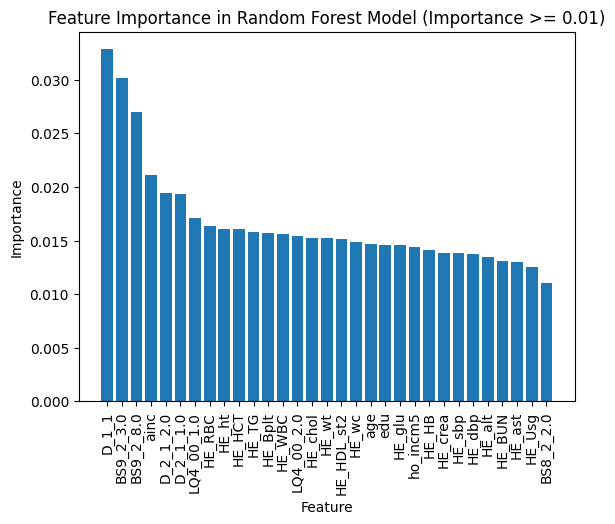

In [26]:
# 사용 모델
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)

model.fit(X_trn, y_trn)

# Feature 중요도 계산
feature_importances = model.feature_importances_

# 중요도가 0.01 이상인 feature만 선택
selected_features = X_trn.columns[feature_importances >= 0.01]

# Feature 중요도 시각화
selected_idx = np.argsort(feature_importances[feature_importances >= 0.01])[::-1]

plt.bar(range(len(selected_features)), feature_importances[feature_importances >= 0.01][selected_idx], align="center")
plt.xticks(range(len(selected_features)), selected_features[selected_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model (Importance >= 0.01)")
plt.show()

### 결론
- Random Forest를 이용하여 학습시 영향 많이 주는 속성은 없음 아마 ANN에 사용한 feature를 그대로 사용하다 보니 이렇게 된것 같다
- Kfold를 사용할때 왜 score가 점점 증가하는지 이유를 모르겠습니다.


추가로 Heatmap 분석한 부분입니다.

train_X_df의 각 feature들의 상관관계를 분석하고 depressed와 얼마나 연관이 있는지 봅니다.

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})

In [28]:
df_new = X_origin

## numerical features의 상관관계

- 사용 features

In [29]:
num_features = ["age",
"ainc",
"HE_sbp",
"HE_dbp",
"HE_ht",
"HE_wt",
"HE_wc",
"HE_glu",
"HE_chol",
"HE_HDL_st2",
"HE_TG",
"HE_ast",
"HE_alt",
"HE_HB",
"HE_HCT",
"HE_BUN",
"HE_crea",
"HE_WBC",
"HE_RBC",
"HE_Bplt",
"HE_Uph",
"HE_Usg",
"depressed"
]

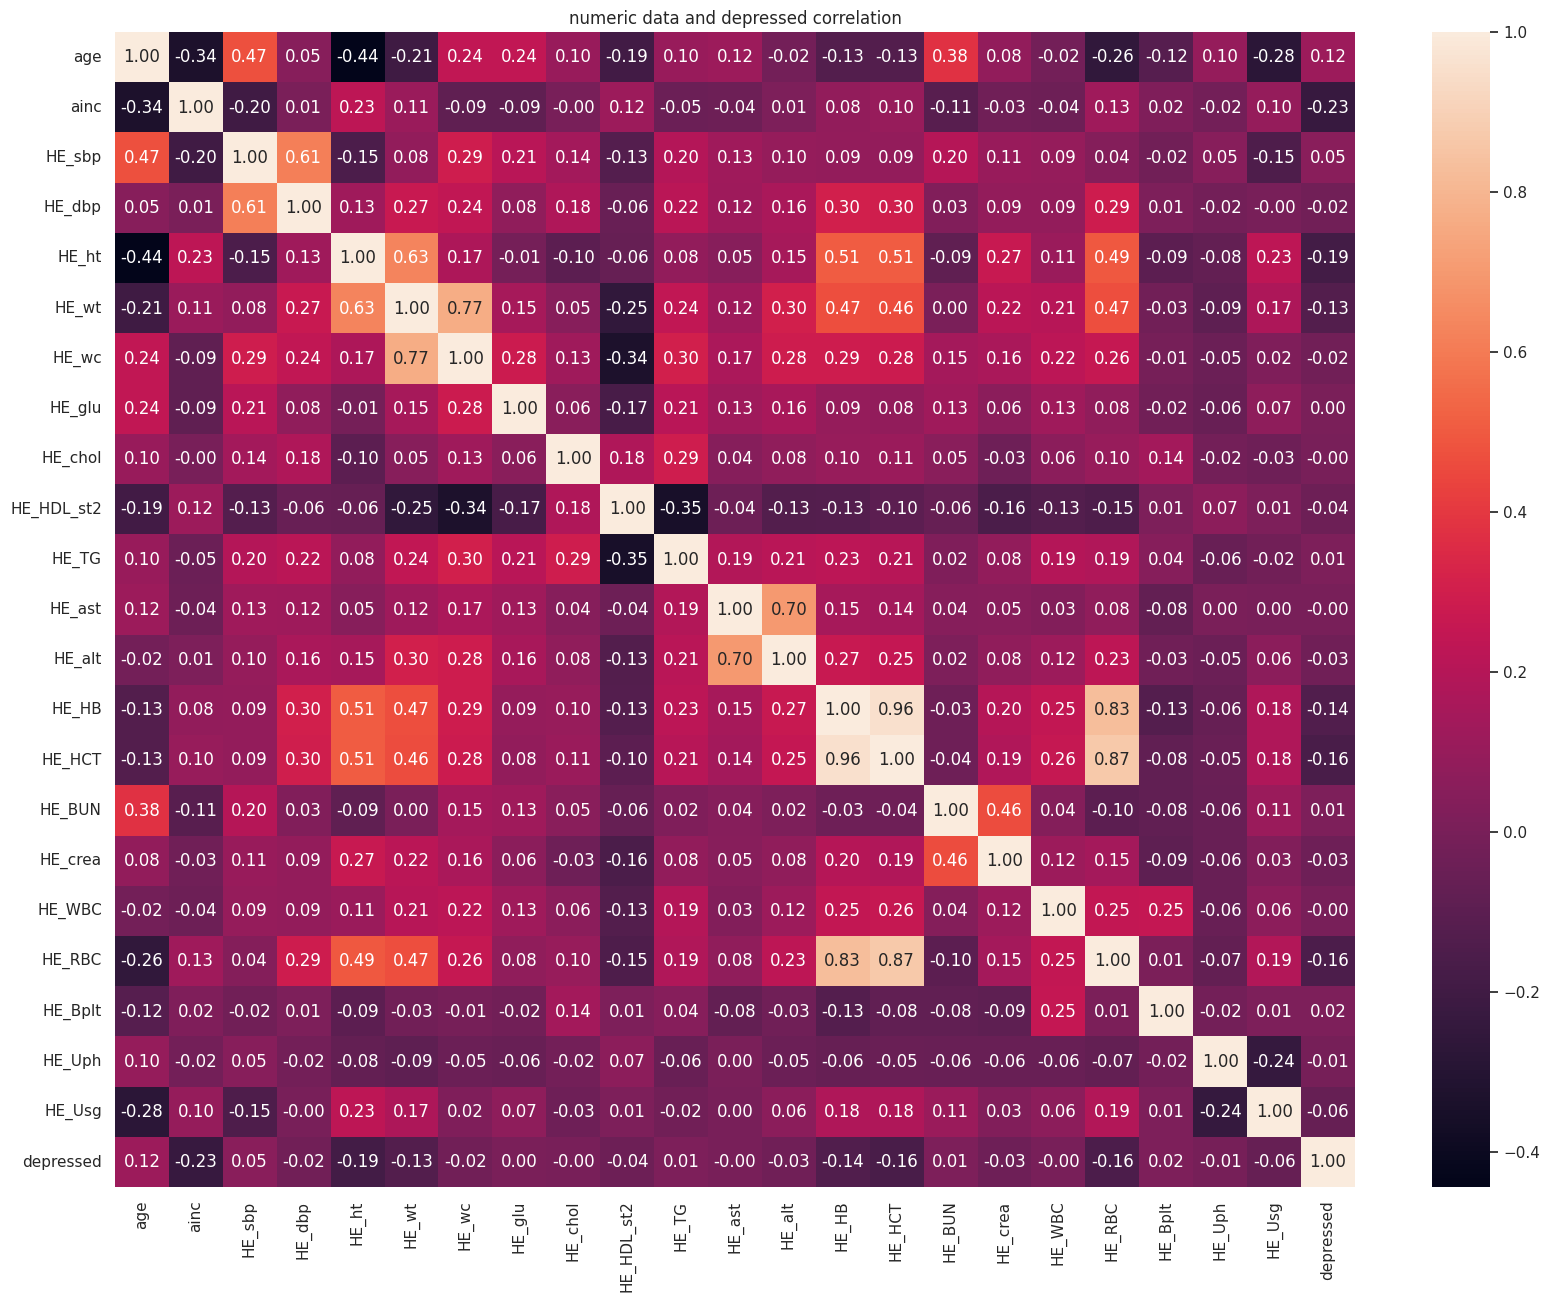

In [30]:
df_num = df_new[num_features]
sns.heatmap(df_num.corr(), annot=True, fmt='.2f')
plt.title("numeric data and depressed correlation")
plt.show()

## label features의 상관관계

- 사용 features

In [31]:
label_features = ["incm",
"ho_incm",
"incm5",
"ho_incm5",
"edu",
"cfam",
"house",
"D_1_1",
"DI3_2",
"BD1_11",
"BD2_1",
"BA2_12",
"BA2_13",
# "BP1",
"BS3_1",
"BE3_31",
"BE5_1",
"depressed",
]

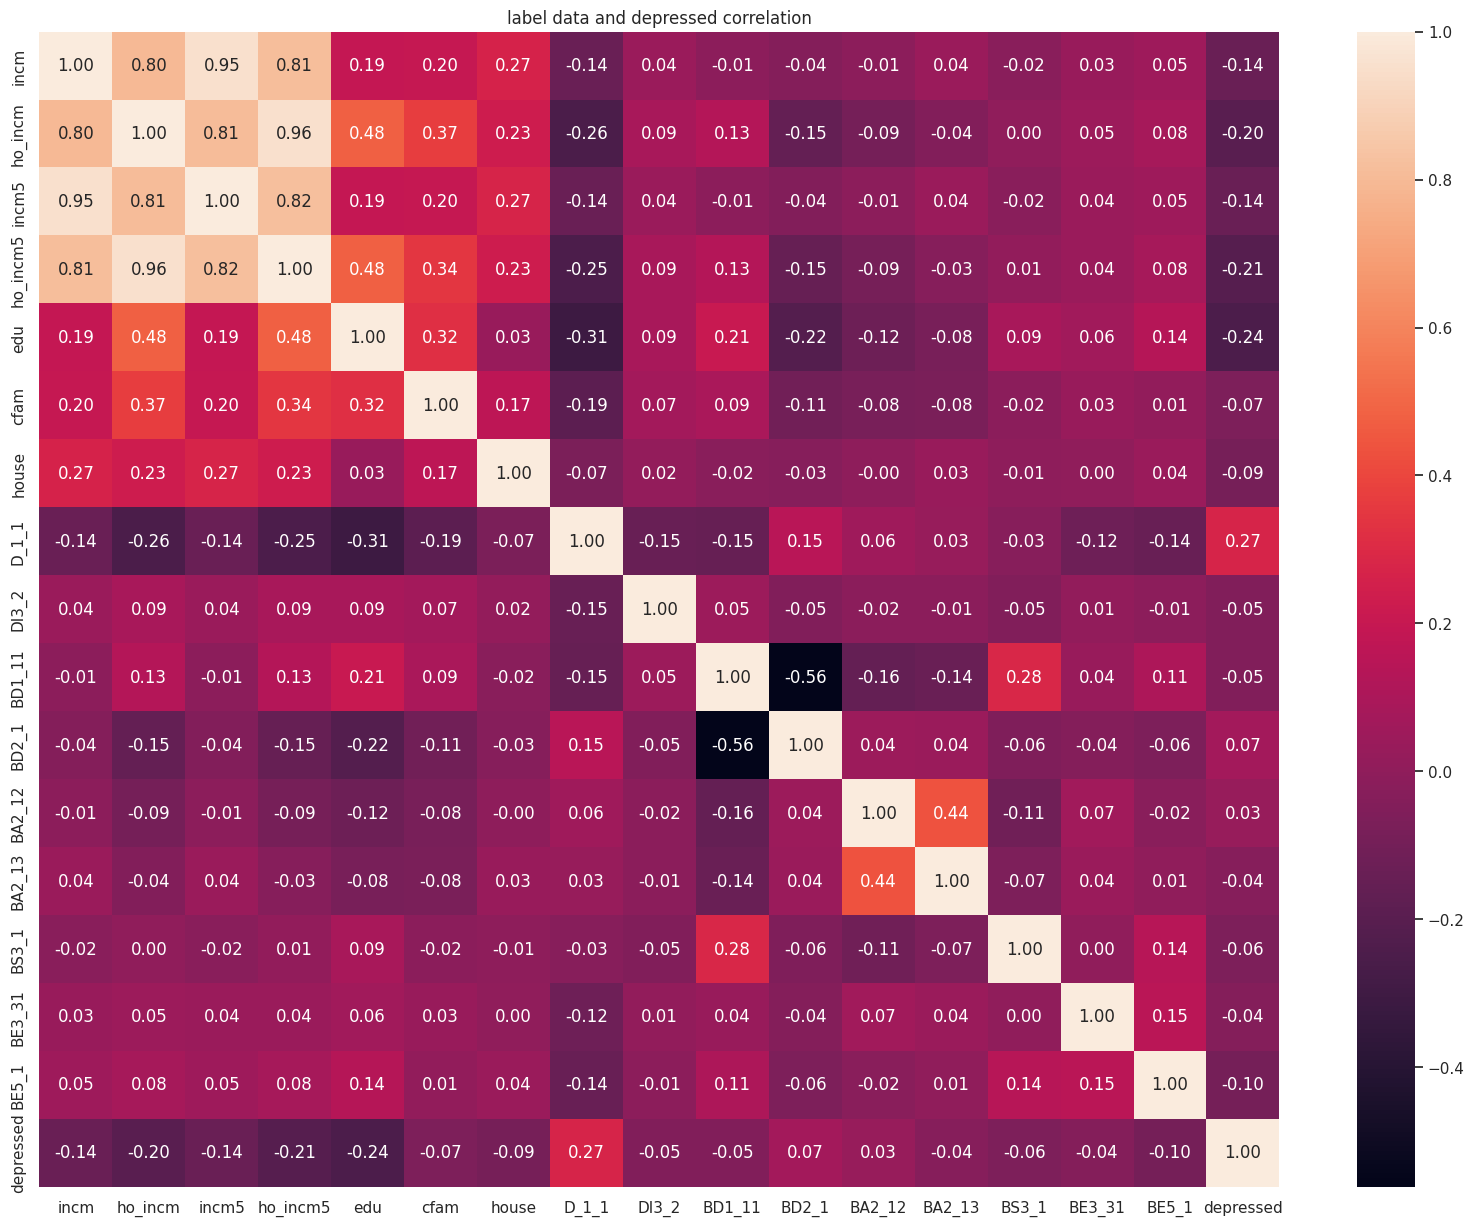

In [32]:
df_label = df_new[label_features]
sns.heatmap(df_label.corr(), annot=True, fmt='.2f')
plt.title("label data and depressed correlation")
plt.show()

## OneHot Features의 상관관계

In [33]:
num = num_features.remove("depressed")
label = label_features.remove("depressed")

- 사용 features

In [34]:
df_onehot = df_new.drop(num_features+label_features, axis=1)

- 상관관계가 0.15보다 높은 값만 선택합니다.

In [35]:
correlation_matrix = df_onehot.corr()
threshold = 0.15

relevant_corr = correlation_matrix['depressed'][correlation_matrix['depressed'].abs() > threshold]

relevant_corr_matrix = df_onehot[relevant_corr.index].corr()

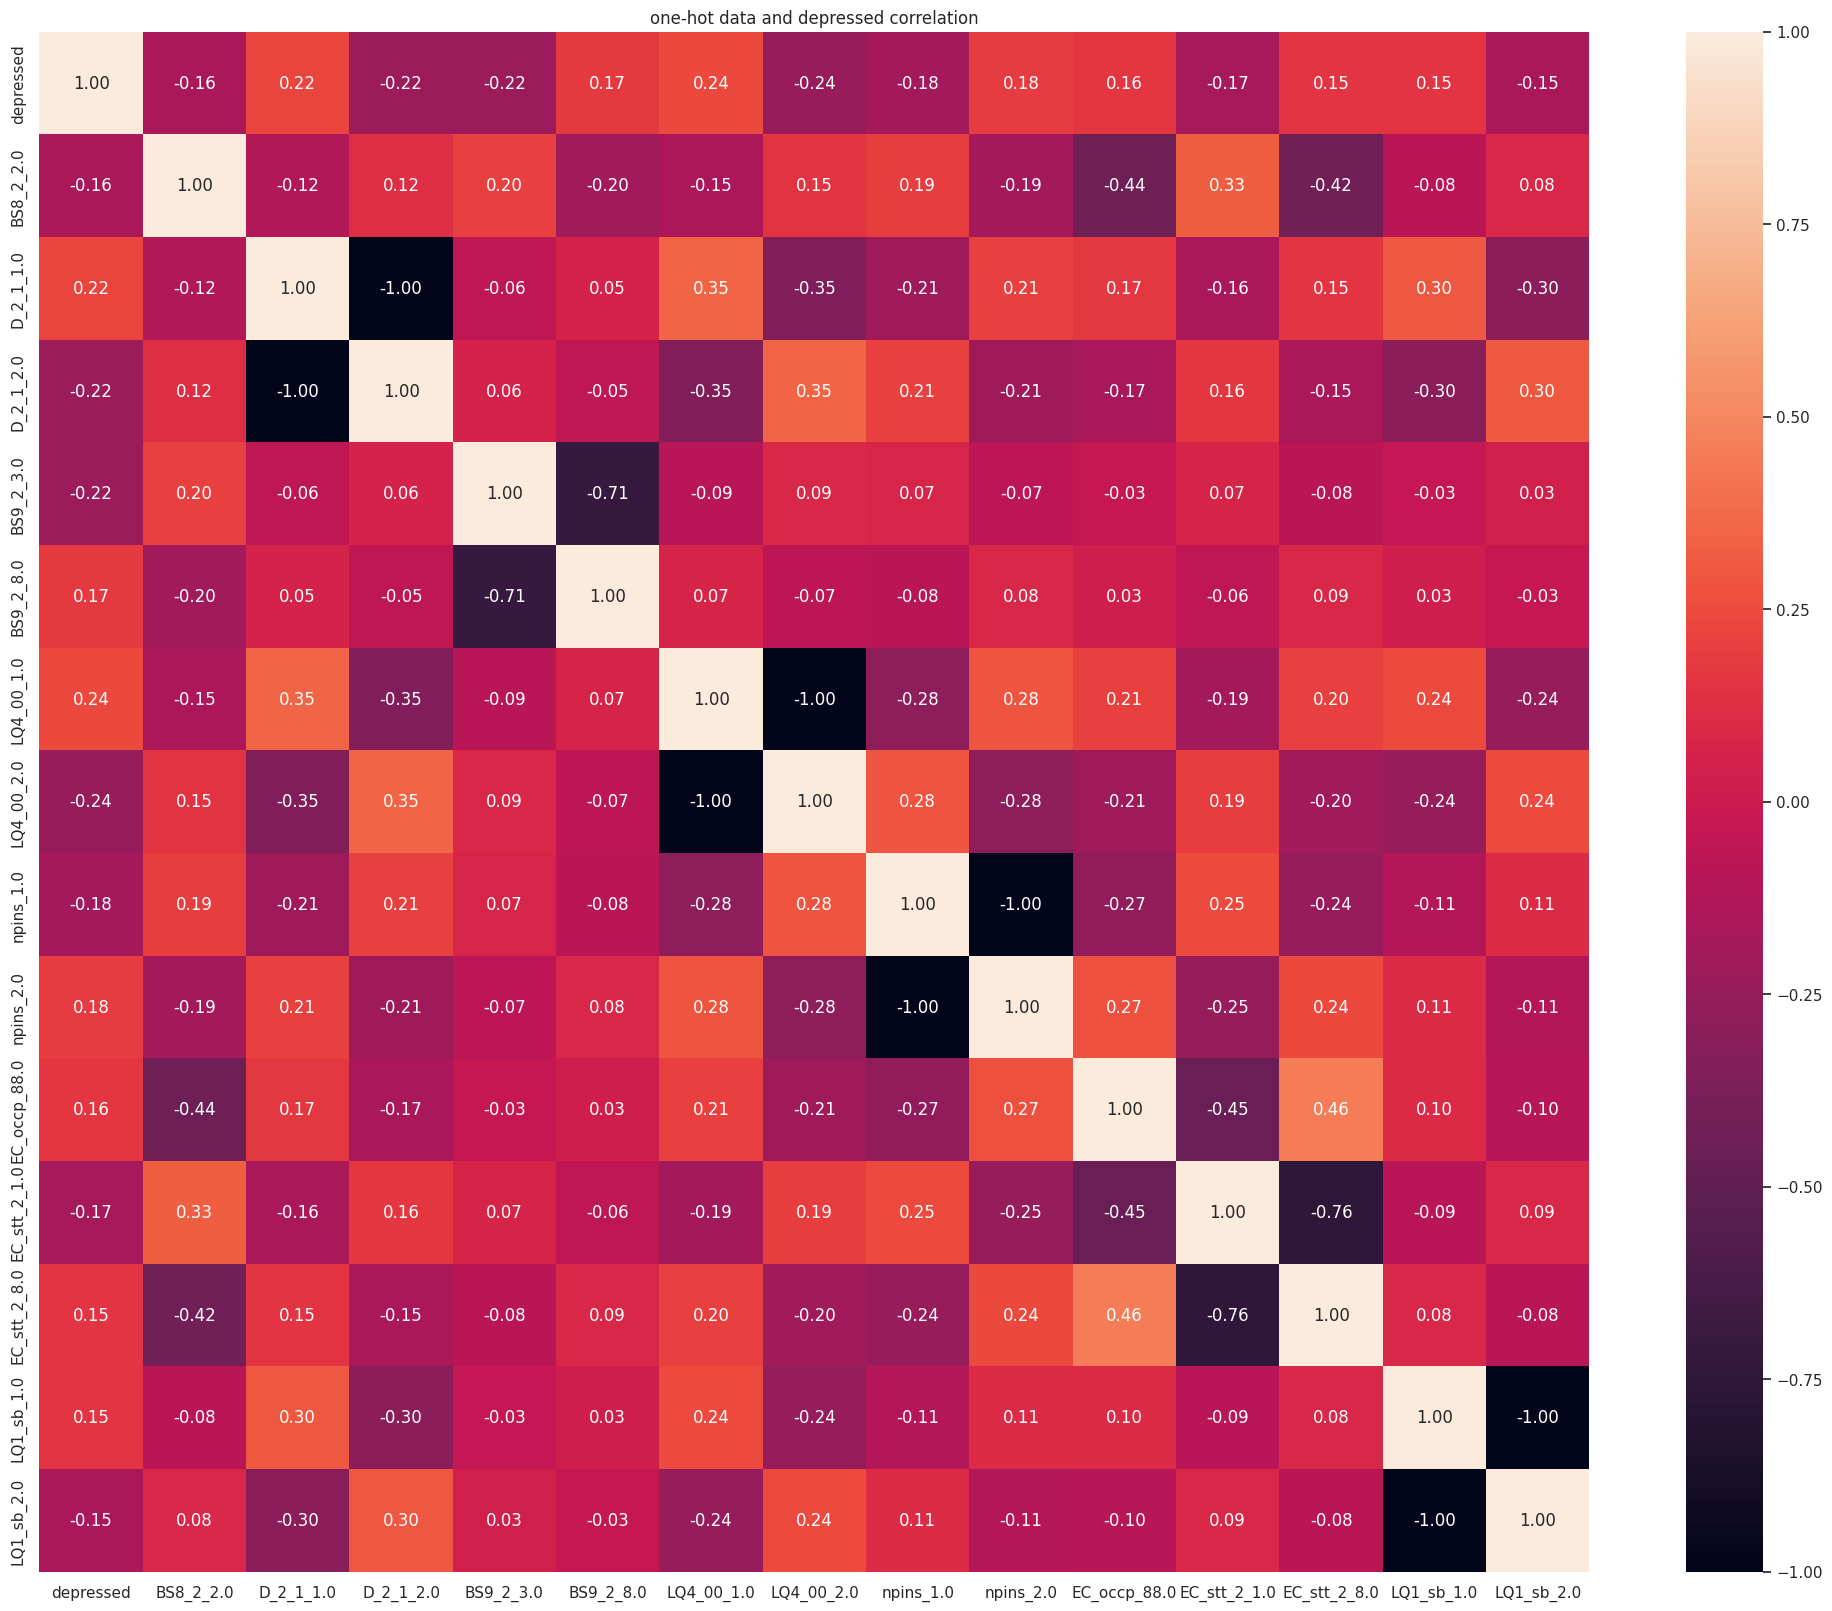

In [36]:
sns.set(rc={'figure.figsize':(25,20)})

sns.heatmap(relevant_corr_matrix, annot=True, fmt='.2f')
plt.title("one-hot data and depressed correlation")
plt.show()

depressed와 유의미하게 관계가 있는 features는 존재하지 않는것 같습니다. 따라서 머신러닝 모델에서는 성능이 그렇게 좋지는 않을 것으로 위 관계만 본다면 미리 예상 가능하고, 하지만 feature가 많은게 어떤 변수를 가져올지는 모르겠습니다.